# Secondary EDA and Modeling

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# Show all columns
pd.set_option('display.max_columns', None)

# Show all rows
pd.set_option('display.max_rows', None)

# Optional: widen display so lines don’t wrap
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)
# sets default size for figures

## Data Importing

In [4]:
df_org = pd.read_csv('../data/cleaned_ameshousing.csv')
# imports the original cleaned dataset (before subsetting)

In [5]:
columns = ['Overall Qual_codes', 'Exter Qual_codes', 'Kitchen Qual_codes', 'TotRms AbvGrd', 'Total Full Bath', 'Neighborhood', 'Sale Type', 'House Style', 'SalePrice']
# these are the columns I choose to simplify the model
# these columns were chosen for their correlation coefficent to Sale Price being very strong (for the ordinal columns)
# the nominal columns were also chosen for their logic connections (neighborhood = location, sale type = type of sale, house style = house frame, like number of stories)

In [6]:
df = df_org[columns]
# creates the dataframe to use for EDA

In [7]:
# df['Overall Qual_codes'] = df['Overall Qual_codes'] + 1
# adjusting this, as the codes were off by 1. Fine for modeling, but not for visualizing 

In [8]:
df.head()
# first 5 rows of the dataframe

,Overall Qual_codes,Exter Qual_codes,Kitchen Qual_codes,TotRms AbvGrd,Total Full Bath,Neighborhood,Sale Type,House Style,SalePrice
0,6,2,2,7,2.0,NAmes,WD,1Story,215000
1,5,2,2,5,1.0,NAmes,WD,1Story,105000
2,6,2,3,6,1.0,NAmes,WD,1Story,172000
3,7,3,4,8,3.0,NAmes,WD,1Story,244000
4,5,2,2,6,2.0,Gilbert,WD,2Story,189900


In [9]:
df_dummies = pd.get_dummies(df, columns=['Neighborhood', 'Sale Type', 'House Style']) 
# this is for modeling. it makes the dummy variables for the nominal (non-numerical) columns. 

## EDA

In [10]:
df.groupby('Neighborhood')['SalePrice'].agg(['mean', 'median', 'count']).sort_values(by=['mean', 'median'], ascending=[False, False])
# groups the dataframe by neighborhood, calculating the mean, median, and count for each neighborhood

,mean,median,count
Neighborhood,,,
NoRidge,330319.126761,302000.0,71
StoneBr,324229.196078,319000.0,51
NridgHt,322018.265060,317750.0,166
GrnHill,280000.000000,280000.0,2
Veenker,248314.583333,250250.0,24
Timber,247713.619718,232500.0,71
Somerst,229707.324176,225500.0,182
ClearCr,208662.090909,197500.0,44
Crawfor,207550.834951,200624.0,103


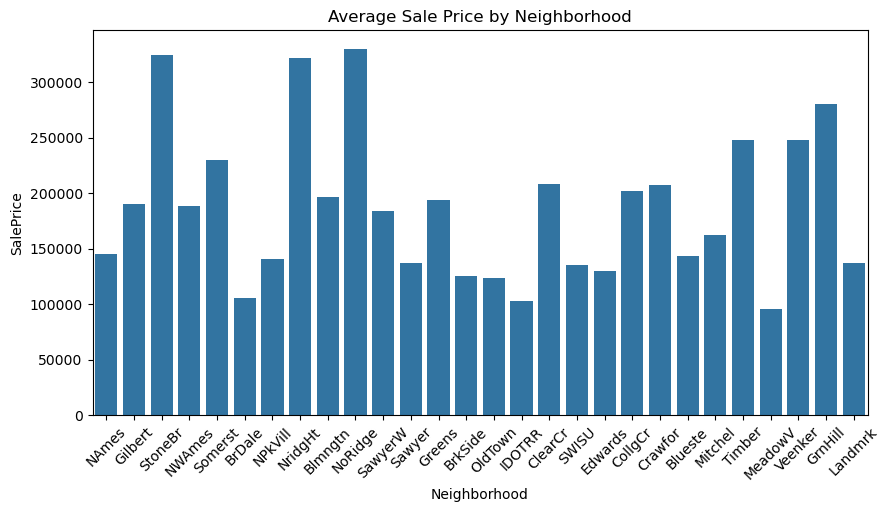

In [11]:
ax = sns.barplot(data=df, x='Neighborhood', y='SalePrice', errorbar=None)
plt.xticks(rotation=45)
plt.title("Average Sale Price by Neighborhood");
# This creates a barplot of the average sale price by neighborhood

> This barplot shows the average sale price of the houses in each neighborhood. We can see that Noridge has the highest average price, while MeadowV has the lowest. 

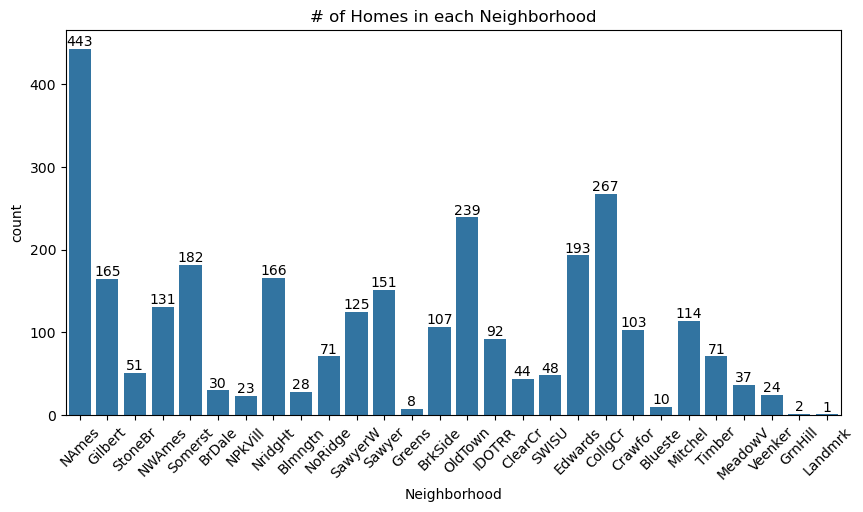

In [12]:
ax = sns.countplot(data=df, x='Neighborhood')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title("# of Homes in each Neighborhood");
# this makes a countplot of the number of houses in each neighborhood

> This shows the numebr of houses in each neighborhood in this dataset. We see that NAmes has the most houses, at 443 houses, while Landmrk only has one house. 

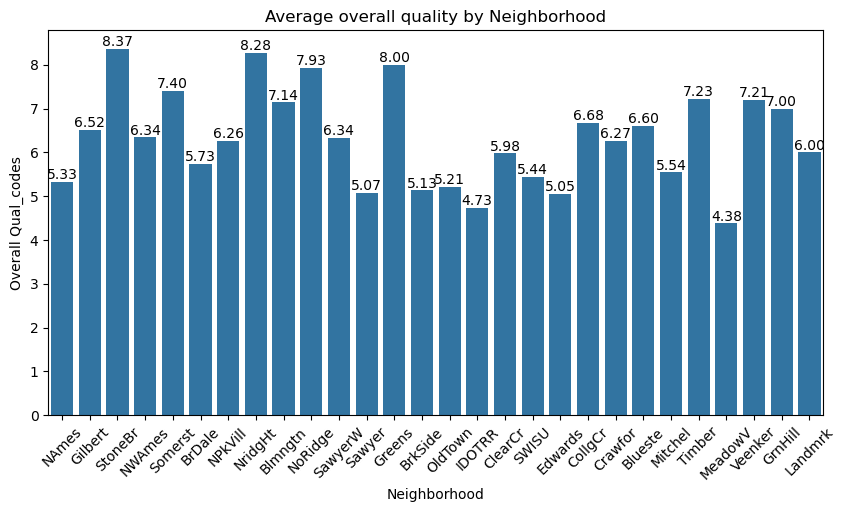

In [13]:
ax = sns.barplot(data=df, x='Neighborhood', y='Overall Qual_codes', errorbar=None)
for container in ax.containers:
    # Use '%.2f' to round the labels to two decimal places
    ax.bar_label(container, fmt='%.2f') 
plt.title("Average overall quality by Neighborhood")
plt.xticks(rotation=45);
# this makes a barplot of the averagw overall quality of houses in each neighborhood. 

> This barplot shows the average overall quality for each neighborhood. Gilbert has the highest average overall quality houses, while TImber has the lowest overall quality houses. 

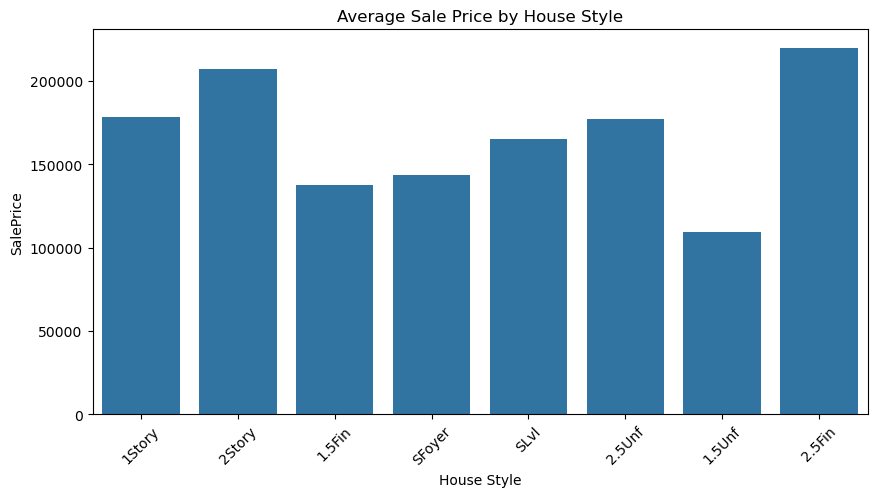

In [14]:
sns.barplot(data=df, x='House Style', y='SalePrice', errorbar=None)
plt.title("Average Sale Price by House Style")
plt.xticks(rotation=45);
# makes a barplot of the average sale price by style of house. 

> Like before with the saleprice by neighborhood, this barplot shows the average saleprice by house style. 

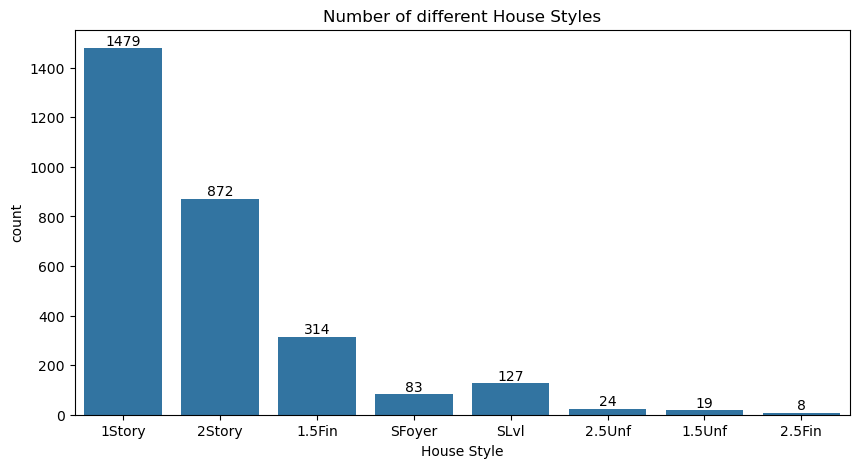

In [15]:
ax = sns.countplot(data=df, x='House Style')
plt.title("Number of different House Styles")
ax.bar_label(ax.containers[0]);
# makes a countplot of the different house styles

> This countplot shows the number of different house styles in this dataset. Most houses are 1 story, while very few are 2.5 stories. 

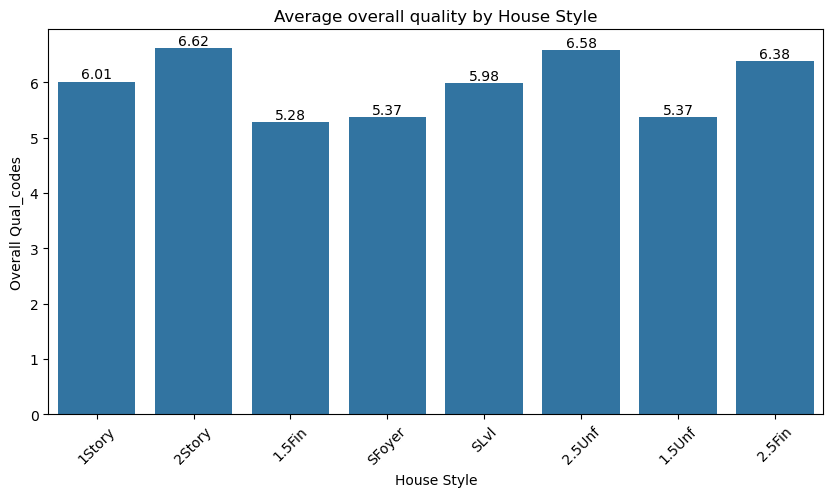

In [16]:
ax = sns.barplot(data=df, x='House Style', y='Overall Qual_codes', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 
plt.title("Average overall quality by House Style")
plt.xticks(rotation=45);
# creates a barplotof the average overall quality by house style

> This is a barplot of the average overall quality for different styles of houses. The house style with the highest average quality is 2story, while the lowest is 1.5 story finished. 

## Modeling

### Linear Regression, Random Forest, Decision Tree

In [17]:
lr = LinearRegression()
# initializes the linear regression model
rf = RandomForestRegressor()
# initializes the random forest model
dt = DecisionTreeRegressor()
# initializes the decision tree model

In [18]:
X = df_dummies.drop(columns='SalePrice')
# this is our features (with nominal columns as dummy variables)
y = df_dummies['SalePrice']
# this is our target variable

In [19]:
models = {'Linear Regression': lr, 'Random Forest': rf, 'Decision Tree': dt}
# made a dictionary of the models to loop through 

In [20]:
sizes = np.arange(0.2, 0.4, 0.01).round(2)
# different sizes to use for test size

In [21]:
r2_scores = []
# array to store r2 score dictionaries
rmse_scores = []
# array to store rmse score dictionaries
for size in sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=size)
    # splits the data into training data and test data
    for name, model in models.items():
        model.fit(X_train, y_train)
        # fits each model
    r2_scores.append({name: model.score(X_test, y_test) for name, model in models.items()})
    # appends the r2 score of each model to the r2_scores list
    rmse_score = {}
    # starts the dictionary to be appended to rmse_scores
    for name, model in models.items():
        y_preds = model.predict(X_test)
        # makes predictions on the X_test set
        y_mean = y_test.mean()
        # calculates the mean of y_test
        baseline_preds = np.full_like(y_test, y_mean)
        # baseline prediction (every prediction is the mean)
        rmse_score[name] = root_mean_squared_error(y_test, y_preds)
        # assigns teh RMSE score to the correct model name
    rmse_score['Baseline'] = root_mean_squared_error(y_test, baseline_preds)
    # adds the baseline score
    rmse_scores.append(rmse_score)
    # appends the rmse_score dictionary to teh rmse_scores list

r2_scores_df = pd.DataFrame(r2_scores)
rmse_scores_df = pd.DataFrame(rmse_scores)
# the above 2 lines make dataframes out of the r2 and rmse scores lists

In [22]:
r2_scores_df['test_size'] = sizes
rmse_scores_df['test_size'] = sizes
# adds a new column to the dataframes, sizes, which contains the different test sizes 

In [23]:
r2_scores_df
# output of r2_scores_df

,Linear Regression,Random Forest,Decision Tree,test_size
0,0.809893,0.839923,0.747608,0.20
1,0.810688,0.840978,0.741517,0.21
2,0.812218,0.839960,0.725994,0.22
3,0.812447,0.836298,0.724017,0.23
4,0.815631,0.841375,0.761333,0.24
5,0.816339,0.842123,0.736503,0.25
6,0.818268,0.839685,0.744585,0.26
7,0.818444,0.845596,0.761016,0.27
8,0.818065,0.848790,0.731727,0.28
9,0.818876,0.847501,0.756924,0.29


In [24]:
rmse_scores_df
# output of the rmse_scores_df

,Linear Regression,Random Forest,Decision Tree,Baseline,test_size
0,36576.088508,33563.172934,42144.057959,83887.772720,0.20
1,36221.239053,33197.258482,42324.326653,83248.070608,0.21
2,35798.356567,33048.417229,43242.990137,82610.615045,0.22
3,35418.213888,33089.621924,42964.143433,81783.298334,0.23
4,35249.106484,32695.674302,40105.152534,82092.575318,0.24
5,35113.729936,32555.768342,42058.754902,81934.837282,0.25
6,34865.111563,32746.262041,41333.143247,81785.235256,0.26
7,34783.940947,32077.604363,39907.719602,81634.342049,0.27
8,34492.064482,31444.981520,41884.147704,80865.131739,0.28
9,34424.541885,31587.340558,39879.621520,80887.270727,0.29


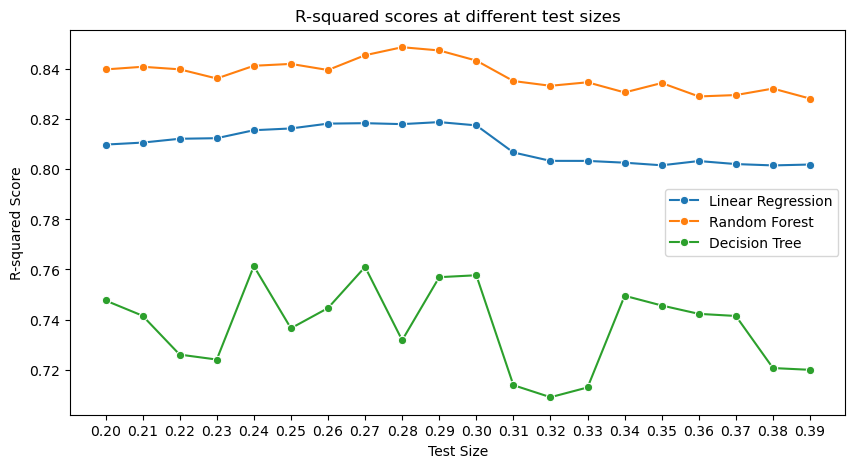

In [25]:
sns.lineplot(data=r2_scores_df, x='test_size', y='Linear Regression', label='Linear Regression', marker='o')
sns.lineplot(data=r2_scores_df, x='test_size', y='Random Forest', label='Random Forest', marker='o')
sns.lineplot(data=r2_scores_df, x='test_size', y='Decision Tree', label='Decision Tree', marker='o')
plt.xlabel("Test Size")
plt.ylabel("R-squared Score")
plt.title("R-squared scores at different test sizes")
plt.xticks(sizes);
# creates multiple lineplots to see how each model performed wuth R2 with differnt test sizes (x-label)

> This is a lineplot of the different models' $R^2$ scores at different test sizes. We see that decision tree model performed the worse consistiently, and that random forest did the best at every test size. Random Forest's best score was at a test size of 0.27, with an $R^2$ score of 0.847, Linear Regression at 0.29, with an $R^2$ score of 0.819, and Decision Tree at a size of 0.29, with a score of 0.766. 

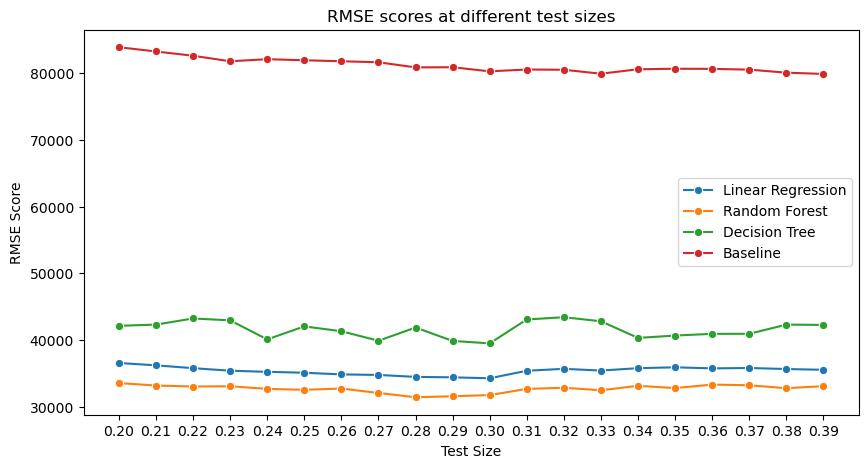

In [26]:
sns.lineplot(data=rmse_scores_df, x='test_size', y='Linear Regression', label='Linear Regression', marker='o')
sns.lineplot(data=rmse_scores_df, x='test_size', y='Random Forest', label='Random Forest', marker='o')
sns.lineplot(data=rmse_scores_df, x='test_size', y='Decision Tree', label='Decision Tree', marker='o')
sns.lineplot(data=rmse_scores_df, x='test_size', y='Baseline', label='Baseline', marker='o')
plt.xlabel("Test Size")
plt.ylabel("RMSE Score")
plt.title("RMSE scores at different test sizes")
plt.xticks(sizes);
# creates multiple lineplots to see how each model performed with RMSE with differnt test sizes (x-label)

> This lineplot shows the RMSE (Root mean squared error) of each model at differnt test sizes, as well as the baseline predictions, which is when the model predicts the mean for every test data point. We can see that every model beat the baseline, which is good, but Random Forest had the best RMSE score, consistently between 31,000 and 34,500. Linear Regression stayed between 34,500 and 37,000, and Decision Tree was between 39,000 and 45,000. Baseline was always higher than this, with a RMSE score of over 80,000. 

## KNN

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
# splits the data into training and test sets. 75/25 split

In [28]:
sc =StandardScaler()
# initializes scaler to scale the features
X_train_sc = sc.fit_transform(X_train)
# fits the scaler to X_train and transforms it, storing the result in X_train_sc
X_test_sc = sc.transform(X_test)
# transforms X_test and stores the result in X_test_sc

In [29]:
scores = []
rmse_scores = []
# list to keep track of scores for different number of neighbors

In [30]:
for n in range(3, 30, 2):
    # loop through the odd numbers from 3 to 30 for differnt neighbor numbers
    knn = KNeighborsRegressor(n_neighbors=n)
    # initializes the KNN regression with specified number of neighbors
    knn.fit(X_train_sc, y_train)
    # fits the data to the knn model
    scores.append({'neighbors': n, 'score': knn.score(X_test_sc, y_test)})
    # appends the number of neighbors nad the socre to the scores list
    knn_preds = knn.predict(X_test_sc)
    # predictions of the knn model on the test set
    baseline_preds = np.full_like(y_test, y_test.mean())
    # bsaeline predictions (uses the mean for every perdiction)
    rmse_scores.append({'neighbors': n, 'score': root_mean_squared_error(y_test, knn_preds), 'baseline': root_mean_squared_error(y_test, baseline_preds)})
    # appends teh dictioanry of the neighbors, rmse score, and baseline score
    

In [31]:
scores_df = pd.DataFrame(scores)
rmse_scores_df = pd.DataFrame(rmse_scores)
# makes a  dataframe out of the scores list. 

In [32]:
scores_df
# shows the R2 score of different number of neighbors

,neighbors,score
0,3,0.795142
1,5,0.812208
2,7,0.805475
3,9,0.792614
4,11,0.785646
5,13,0.775241
6,15,0.768174
7,17,0.762607
8,19,0.756713
9,21,0.753012


In [33]:
rmse_scores_df
# shows the RMSE score of different number of neighbors

,neighbors,score,baseline
0,3,37084.760522,81934.837282
1,5,35506.403218,81934.837282
2,7,36137.308728,81934.837282
3,9,37312.831406,81934.837282
4,11,37934.475417,81934.837282
5,13,38844.318461,81934.837282
6,15,39450.212165,81934.837282
7,17,39921.117731,81934.837282
8,19,40413.649538,81934.837282
9,21,40719.855397,81934.837282


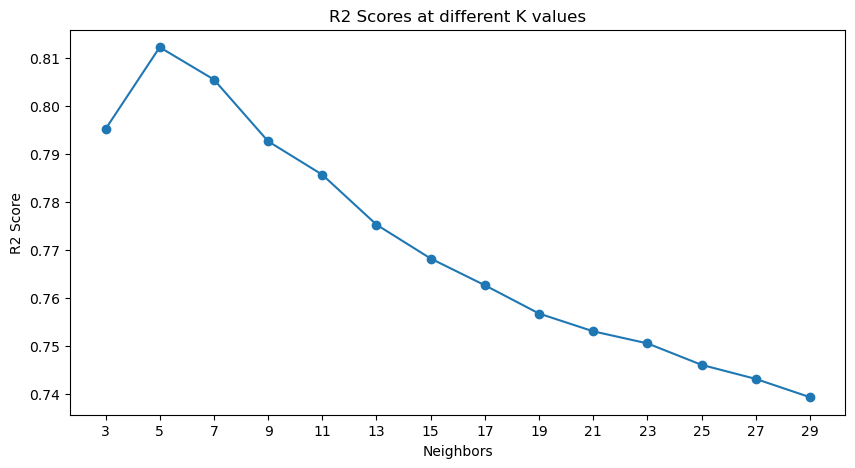

In [34]:
plt.plot(scores_df['neighbors'], scores_df['score'], marker='o')
plt.xlabel("Neighbors")
plt.ylabel("R2 Score")
plt.title("R2 Scores at different K values")
plt.xticks(range(3, 30, 2));
# plots the line showing how well the model did (R2 score) with differnt number of neighbors

> This lineplot shows the $R^2$ score of the KNN Regression model for different numbers of neighbors. We see that at 5 neighbors was the best performance, with an $R^2$ score of 0.81. 

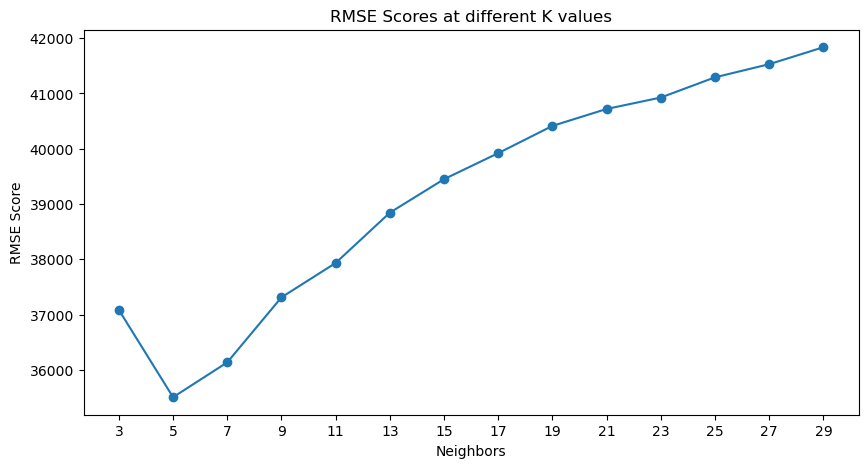

In [35]:
plt.plot(rmse_scores_df['neighbors'], rmse_scores_df['score'], marker='o')
plt.xlabel("Neighbors")
plt.ylabel("RMSE Score")
plt.title("RMSE Scores at different K values")
plt.xticks(range(3, 30, 2));
# plots the line showing how well the model did (RMSE score) with differnt number of neighbors

> This shows us the RMSE scores at each neighbor, K, and we see that again, at 5 neighbors, was teh best perforamce, getting an RMSE score of ~35,500. 

## Results

My original model, using 26 features in total had an $R^2$ score of around 0.86, and an RMSE of 30,000 for my Linear Regression model. WIth this further reduced list of features, none of the models beat the original Linear Regression model, with the Random Forest model being the closest at an $R^2$ score of 0.84 and an RMSE score between 31,000 and 34,500. 